# Basic Trees Using L-Systems
## CSCI 5314: Dynamic Models in Biology
## Allison Liu and Anna McTigue

Aristid Lindemayer, a biologist, invented a formal system that provides a mathematical description of plant growth in 1968 to model the growth of biological systems, called an L-system. 

### I. Starting
First import the turtle package and then initialize the starter functions.

In [ ]:
# CODE: https://github.com/ambron60/l-system-drawing
# MAIN CODE: https://github.com/paulgb/bitaesthetics/blob/master/notebooks/Fractal%20Generation%20with%20L-Systems.ipynb

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from math import pi, sin, cos, isnan
DEGREES_TO_RADIANS = pi / 180
plt.style.use('bmh')  # Use some nicer default colors

In [23]:
def plot_coords(coords, bare_plot=False):
    '''This function takes a list of coordinates we want the turtle to travel to and converts them to lists of coordinates in the form to be plotted by matplotlib.'''
    if bare_plot:
        # Turns off the axis markers.
        plt.axis('off')
    # plt.margins(x=0.1, y=0.1)
    # Ensures equal aspect ratio.
    plt.axes().set_aspect('equal', 'datalim')
    # Converts a list of coordinates into 
    # lists of X and Y values, respectively.
    X, Y = zip(*coords)
    # Draws the plot.
    plt.plot(X, Y, 'k', linewidth=0.5);

def print_coords(coords):
    '''Print a list of the coordinates if needed.'''
    for (x, y) in coords:
        if isnan(x):
            print('<gap>')
        else:
            print('({:.2f}, {:.2f})'.format(x, y))

def transform_sequence(sequence, transformations):
    '''Transform the dictionary representation of the rule path to a string.'''
    return ''.join(transformations.get(c, c) for c in sequence)

def transform_multiple(sequence, transformations, iterations):
    '''Transform sequence multiple times.'''
    for _ in range(iterations):
        sequence = transform_sequence(sequence, transformations)
    return sequence

def branching_turtle_to_coords(turtle_program, turn_amount=45):
    '''This function allows us to plot non-continuous paths.'''
    saved_states = list()
    state = (0, 0, 90)
    yield (0, 0)

    for command in turtle_program:
        x, y, angle = state

        if command.lower() in 'abcdefghij':        # Move forward (matches a-j and A-J)
            state = (x - cos(angle * DEGREES_TO_RADIANS),
                     y + sin(angle * DEGREES_TO_RADIANS),
                     angle)
            
            if command.islower():                  # Add a break in the line if command matches a-j
                yield (float('nan'), float('nan'))

            yield (state[0], state[1])

        elif command == '+':                       # Turn clockwise
            state = (x, y, angle + turn_amount)

        elif command == '-':                       # Turn counterclockwise
            state = (x, y, angle - turn_amount)

        elif command == '[':                       # Remember current state
            saved_states.append(state)

        elif command == ']':                       # Return to previous state
            state = saved_states.pop()
            yield (float('nan'), float('nan'))
            x, y, _ = state
            yield (x, y)

        # Note: We silently ignore unknown commands

def l_plot(axiom, transformations, iterations=0, angle=45):
    '''Combining the above three functions, we can now plot L-systems.'''
    turtle_program = transform_multiple(axiom, transformations, iterations)
    coords = branching_turtle_to_coords(turtle_program, angle)
    plot_coords(coords, bare_plot=True) # bare_plot removes the axis labels

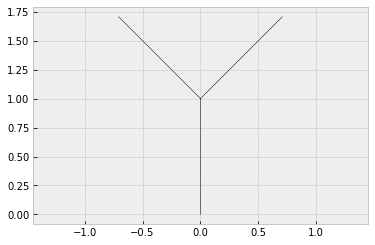

In [24]:
plot_coords(branching_turtle_to_coords('F[-F]+F', 45))

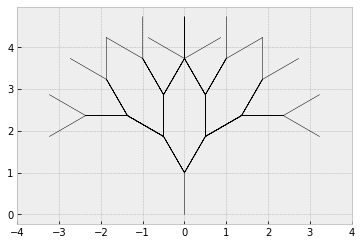

In [25]:
l_plot('F', {'F': 'F[-F][+F]'}, 4, 30)

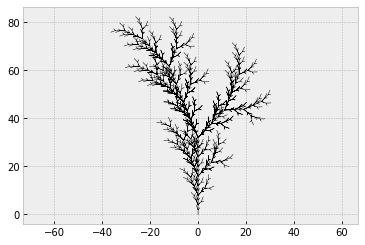

In [26]:
l_plot('F', {'F': 'FF[++F][-FF]'}, 5, 22)

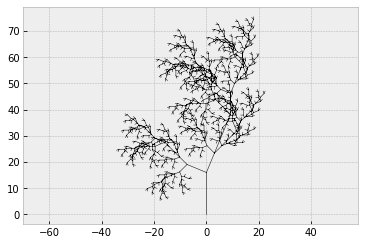

In [27]:
l_plot('A', {'F': 'FF', 'A': 'F[+AF-[A]--A][---A]'}, 5, 22.5)

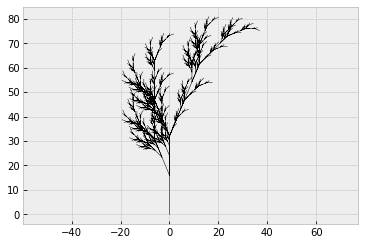

In [28]:
l_plot('A', {'A': 'F-[[A]+A]+F[+FA]-A', 'F': 'FF'}, 5, 22.5)